In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.seed(1)
n = 1000

dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Microphone', 'Keyboard'], n)
prices = np.round(np.random.uniform(50.0, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantities': quantities,
}

df = pd.DataFrame(data)
df


,Date,Product,Price,Quantities
0,2050-01-01,Microphone,90.30,1
1,2050-01-02,Keyboard,171.24,13
2,2050-01-03,Tablet,94.29,4
3,2050-01-04,Camera,131.62,7
4,2050-01-05,Microphone,123.19,5
...,...,...,...,...
995,2052-09-22,Tablet,187.70,9
996,2052-09-23,Tablet,175.51,11
997,2052-09-24,Keyboard,132.81,8
998,2052-09-25,Keyboard,180.14,3


In [28]:
df.dtypes

Date          datetime64[ns]
Product               object
Price                float64
Quantities             int32
dtype: object

In [29]:
df.to_csv

<bound method NDFrame.to_csv of           Date     Product   Price  Quantities
0   2050-01-01  Microphone   90.30           1
1   2050-01-02    Keyboard  171.24          13
2   2050-01-03      Tablet   94.29           4
3   2050-01-04      Camera  131.62           7
4   2050-01-05  Microphone  123.19           5
..         ...         ...     ...         ...
995 2052-09-22      Tablet  187.70           9
996 2052-09-23      Tablet  175.51          11
997 2052-09-24    Keyboard  132.81           8
998 2052-09-25    Keyboard  180.14           3
999 2052-09-26       Phone  177.48          10

[1000 rows x 4 columns]>

In [30]:
df.to_csv('random_sales.csv', index=True)

In [31]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df.head()

,Unnamed: 0,Date,Product,Price,Quantities
0,0,2050-01-01,Microphone,90.30,1
1,1,2050-01-02,Keyboard,171.24,13
2,2,2050-01-03,Tablet,94.29,4
3,3,2050-01-04,Camera,131.62,7
4,4,2050-01-05,Microphone,123.19,5


In [32]:
df.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Product               object
Price                float64
Quantities             int64
dtype: object

In [33]:
df.to_excel('sales_data.xlsx')

In [34]:
df.to_json('sales_data.json')

In [35]:
df.shape

(1000, 5)

In [36]:
df.describe().round(2)

,Unnamed: 0,Date,Price,Quantities
count,1000.00,1000,1000.00,1000.00
mean,499.50,2051-05-15 11:59:59.999999488,126.46,7.49
min,0.00,2050-01-01 00:00:00,50.11,1.00
25%,249.75,2050-09-07 18:00:00,88.15,4.00
50%,499.50,2051-05-15 12:00:00,127.22,8.00
75%,749.25,2052-01-20 06:00:00,164.99,11.00
max,999.00,2052-09-26 00:00:00,199.78,14.00
std,288.82,NaN,43.89,4.01


In [37]:
df.values[:5]

array([[0, Timestamp('2050-01-01 00:00:00'), 'Microphone', 90.3, 1],
       [1, Timestamp('2050-01-02 00:00:00'), 'Keyboard', 171.24, 13],
       [2, Timestamp('2050-01-03 00:00:00'), 'Tablet', 94.29, 4],
       [3, Timestamp('2050-01-04 00:00:00'), 'Camera', 131.62, 7],
       [4, Timestamp('2050-01-05 00:00:00'), 'Microphone', 123.19, 5]],
      dtype=object)

In [38]:
product_sales = df.groupby('Product')['Quantities'].sum()
product_sales

Product
Camera        1451
Keyboard      1501
Microphone    1444
Phone         1610
Tablet        1487
Name: Quantities, dtype: int64

In [39]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camera        124.52
Keyboard      127.64
Microphone    124.61
Phone         127.39
Tablet        127.90
Name: Price, dtype: float64

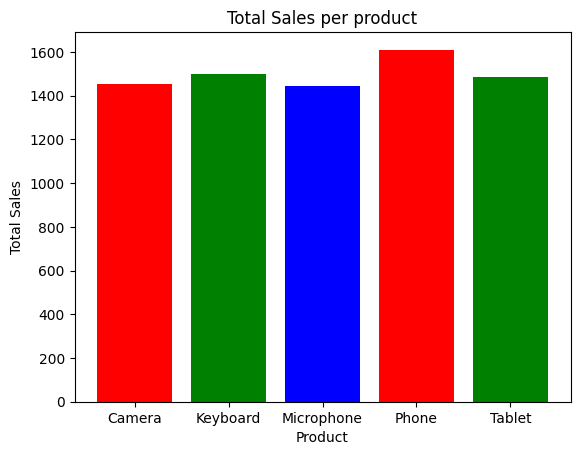

In [40]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.title('Total Sales per product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

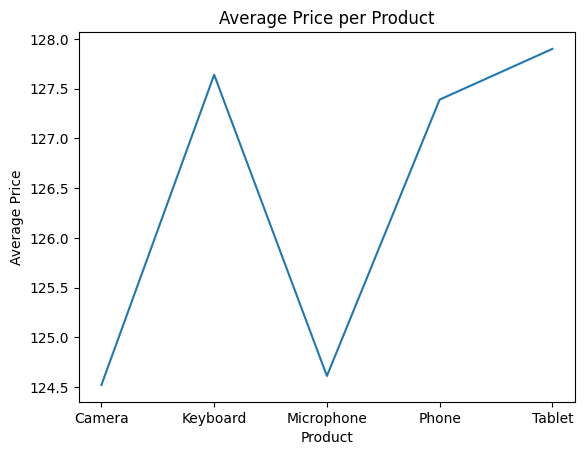

In [41]:
plt.plot(average_prices.index, average_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()